In [2]:
import numpy as np
from numpy import random
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt

In [3]:
def infer_posterior(mu_n,labda_n,a_n,b_n,mu,tau):
    p1 = norm(mu_n, 1/labda_n).pdf(mu)
    p2 = gamma.pdf(tau, a_n, loc = 0, scale = 1/b_n)
    pos = p1*p2
    return pos

In [4]:
def exact_posterior(mu_s,labda_s,a_s,b_s,mu,tau):
    var = 1/(labda_s*tau)
    p1 = norm(mu_s, var).pdf(mu)
    p2 = gamma.pdf(tau, a_s, loc = 0, scale = 1/b_s)
    pos = p1*p2
    return pos

In [5]:
def cal_parameter(labda_0,mu_0,a_0,b_0,x):
    n = len(x)
    sum_x = sum(x)
    mean_x = np.mean(x)
    sub = [i - mean_x for i in x]
    sub_square = [j**2 for j in sub]

    a_s = (n + 1) / 2 + a_0
    b_s = 0.5*(sum(sub_square) + n*labda_0*(mean_x - mu_0)**2 / (n+labda_0)) + b_0
    labda_s = n + labda_0
    mu_s = (sum_x+labda_0*mu_0) / labda_s

    return a_s,b_s,labda_s,mu_s

In [6]:
def update(labda_0,mu_0,a_0,b_0,mu_ni,labda_ni,x):
    n = len(x)
    sum_x = sum(x)
    mean_x = np.mean(x)
    square = [i**2 for i in x]
    sum_square = sum(square)

    a_n = (n + 1) / 2 + a_0
    b_n = 0.5*(sum_square - 2*(sum_x+labda_0*mu_0)*mu_ni + (n+labda_0)*(mu_ni**2+1/labda_ni) + labda_0*mu_0**2) + b_0
    #b_n = a_n * n / sum(sub_square)
    mu_n = (sum_x + labda_0 * mu_0) / (n + labda_0)
    labda_n = (a_n/b_n) * (n + labda_0)

    return a_n,b_n,labda_n,mu_n

In [7]:
def Generate_data(N):
    data = random.rand(N)
    data = [i - np.mean(data) for i in data]
    data = [i / np.var(data)**0.5 for i in data]

    return data

In [101]:
def plot_posterior(mu, tau, ep, vp):
    [mu_show, tau_show] = np.meshgrid(mu,tau)
    plt.figure()
    plt.axis([-0.2, 0.2, 0, 2])
    plt.contour(mu_show,tau_show,ep,colors='b')
    plt.contour(mu_show,tau_show,vp,colors='r')
    plt.xlabel('mu')
    plt.ylabel('tau')
    plt.show()

In [109]:
#initialization
a_0 = 6
b_0 = 2
mu_0 = 0
labda_0 = 1
D = 50
N = 20

In [94]:
#update parameters
mu_n = 0.1
labda_n = 0.1
a_n = 0
b_n = 0
iteration = 10

In [98]:
#generate data
mu = np.linspace(-2.0, 2.0, D)
tau = np.linspace(-2.0, 2.0, D)
Data = Generate_data(N)

In [110]:
ep =  np.zeros((D,D), dtype=float)
vp =  np.zeros((D,D), dtype=float)
# compute exact posterior
a_s,b_s,labda_s,mu_s = cal_parameter(labda_0,mu_0,a_0,b_0,Data)
for i in range(D):
    for j in range(D):
        ep[i,j] = exact_posterior(mu_s,labda_s,a_s,b_s,mu[j],tau[i])

#update the parameters
for i in range(iteration):
    a_n,b_n,labda_n,mu_n = update(labda_0,mu_0,a_0,b_0,mu_n,labda_n,Data)
    
#compute inferred variational posterior:
for i in range(D):
    for j in range(D):
        vp[i,j] = infer_posterior(mu_n,labda_n,a_n,b_n,mu[j],tau[i])

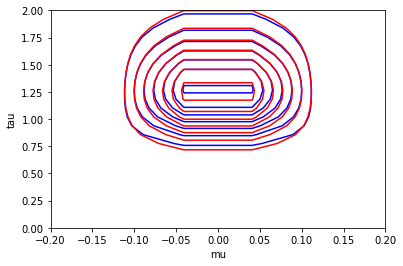

In [111]:
plot_posterior(mu, tau, ep, vp)